# Brent Oil Price Change Point Analysis
**Author:** Mulsew M. Tesfaye

This notebook analyzes historical Brent Oil prices to detect change points, trends, and seasonality. The insights help understand major shifts in oil markets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose

## Load and Inspect Data

In [2]:
df = pd.read_csv('../data/raw/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## Data Cleaning and Preprocessing
- Convert date format to `YYYY-MM-DD`
- Handle missing values
- Sort data chronologically

In [3]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
df = df.dropna(subset=['Date']).sort_values(by='Date')
df.to_csv('../data/processed/BrentOilPrices_cleaned.csv', index=False)
df.head()

/var/folders/5k/spsmltbj1jg0m87zn5zdbd1r0000gn/T/ipykernel_34344/3916337780.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
/var/folders/5k/spsmltbj1jg0m87zn5zdbd1r0000gn/T/ipykernel_34344/3916337780.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


## Time Series Visualization

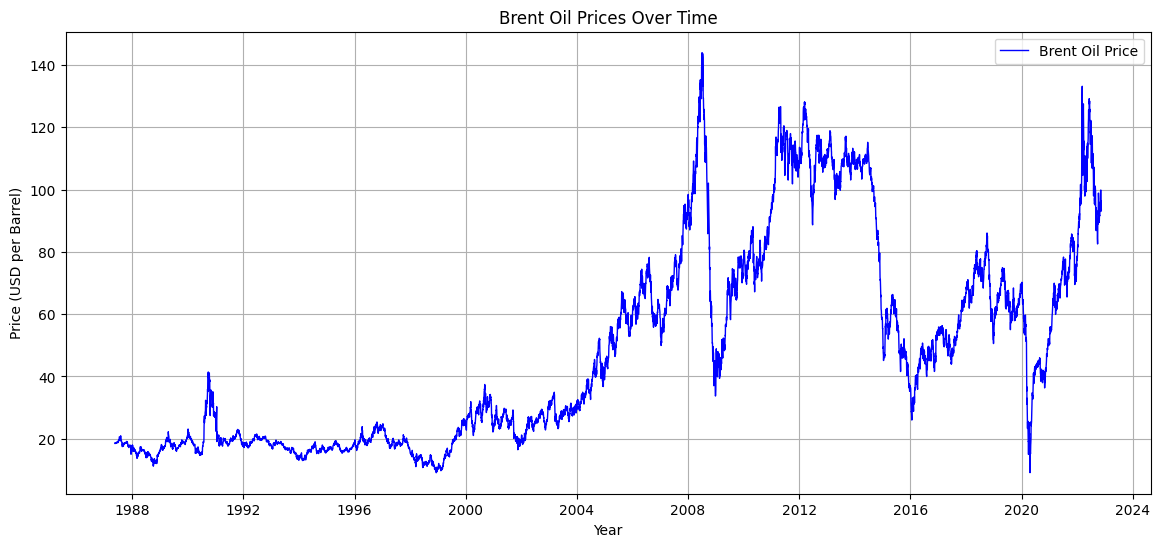

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Price (USD per Barrel)')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Change Point Detection using CUSUM Method

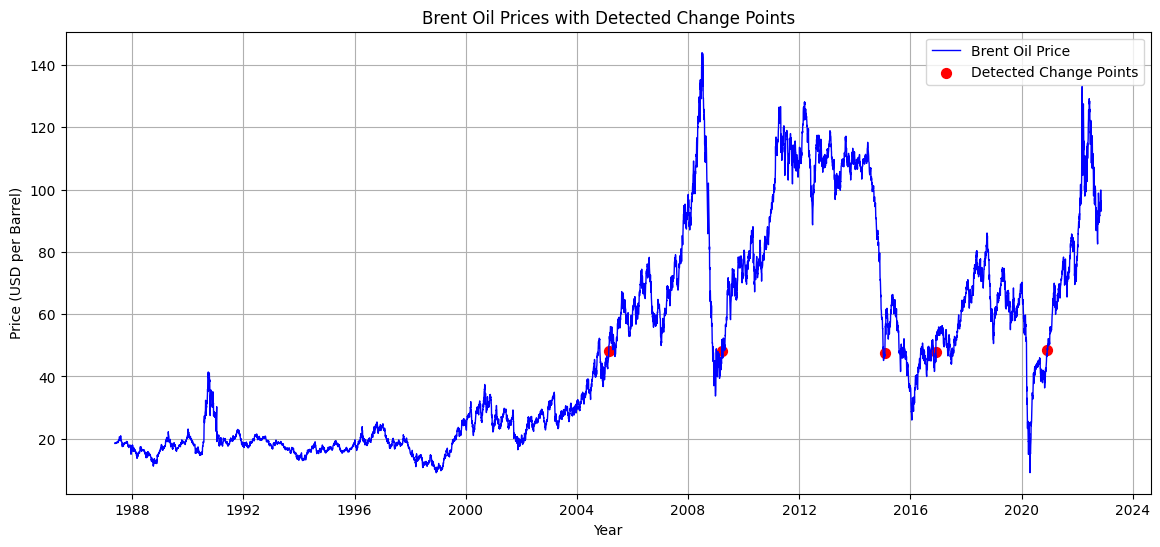

,Date,Price
4520,2005-02-23,48.16
5551,2009-03-19,48.03
7025,2015-01-30,47.52
7495,2016-11-30,47.95
8518,2020-12-03,48.37


In [5]:
mean_price = df['Price'].mean()
cusum = np.cumsum(df['Price'] - mean_price)
peaks, _ = find_peaks(np.abs(cusum), distance=365)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue', linewidth=1)
plt.scatter(df['Date'].iloc[peaks], df['Price'].iloc[peaks], color='red', label='Detected Change Points', marker='o', s=50)
plt.xlabel('Year')
plt.ylabel('Price (USD per Barrel)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.grid(True)
plt.show()

# Display Change Points
df.iloc[peaks][['Date', 'Price']]

## Trend and Seasonality Analysis

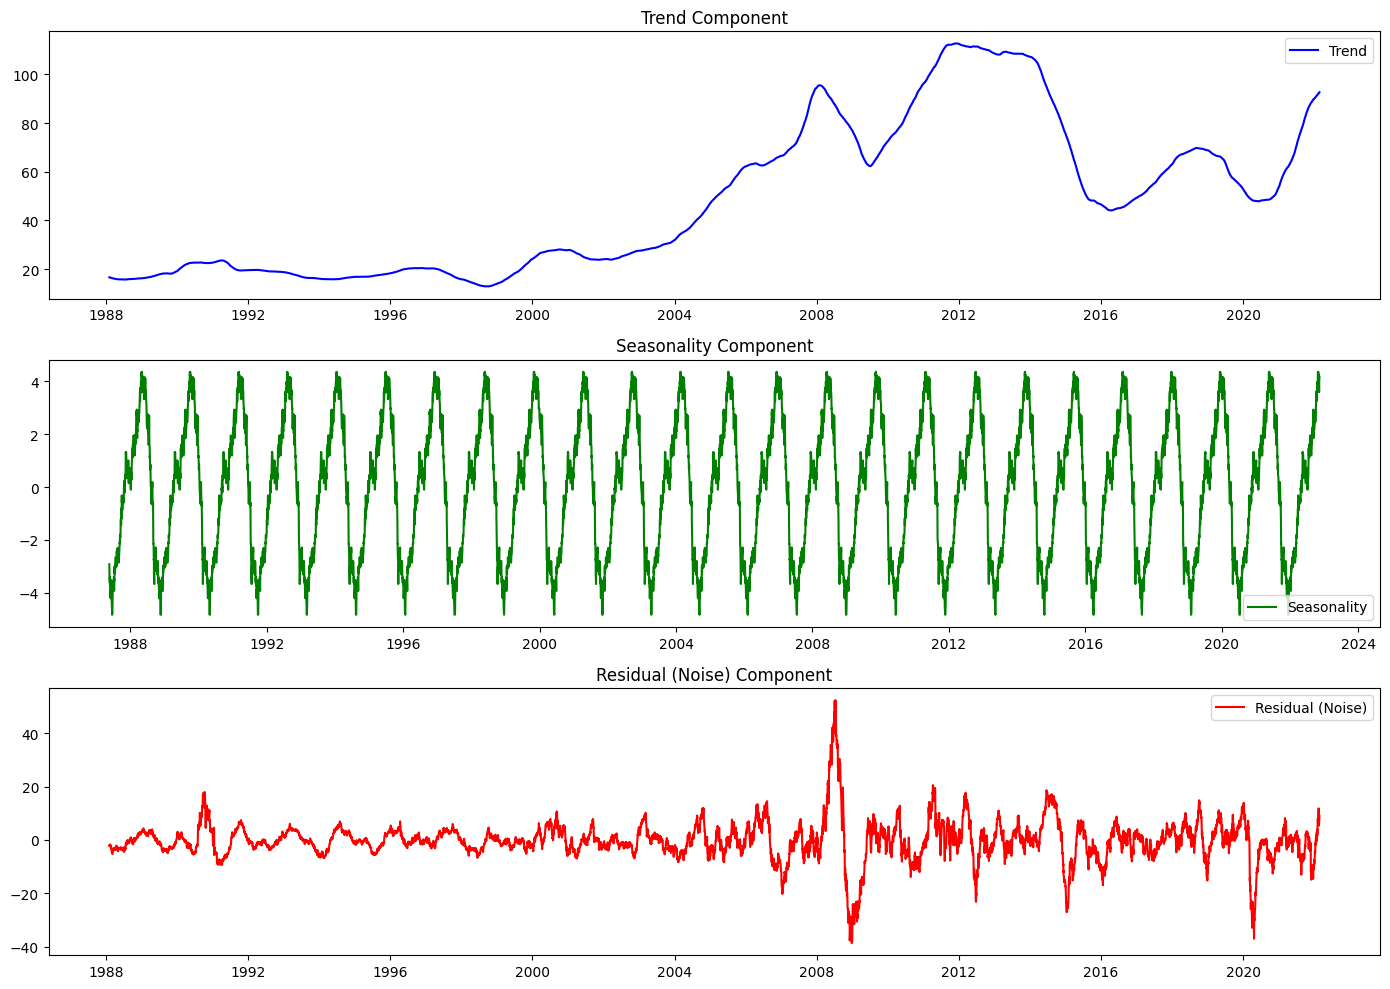

In [7]:
decomposition = seasonal_decompose(df.set_index('Date')['Price'], model='additive', period=365)

# Plot Decomposed Components
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend()
plt.title('Trend Component')

plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()
plt.title('Seasonality Component')

plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label='Residual (Noise)', color='red')
plt.legend()
plt.title('Residual (Noise) Component')

plt.tight_layout()
plt.show()